# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Check the Version of TensorFlow and Access to GPU

This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook

time_limit = 100
y1_lower = -50
y1_upper = 30
y2_lower = -1
y2_upper = 1

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_clear(fig):
    fig.clear()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =    1, total reward = -2052.926
Episode =    2, total reward = -2185.397
Episode =    3, total reward = -2654.622
Episode =    4, total reward = -2513.021
Episode =    5, total reward = -2394.607
Episode =    6, total reward = -2385.052
Episode =    7, total reward = -2177.376
Episode =    8, total reward = -1985.274
Episode =    9, total reward = -2481.624
Episode =   10, total reward = -2041.675
Episode =   11, total reward = -2122.783
Episode =   12, total reward = -1799.742
Episode =   13, total reward = -2318.795
Episode =   14, total reward = -1858.909
Episode =   15, total reward = -1725.861
Episode =   16, total reward = -2047.133
Episode =   17, total reward = -2145.155
Episode =   18, total reward = -2383.187
Episode =   19, total reward = -2298.323
Episode =   20, total r

<IPython.core.display.Javascript object>


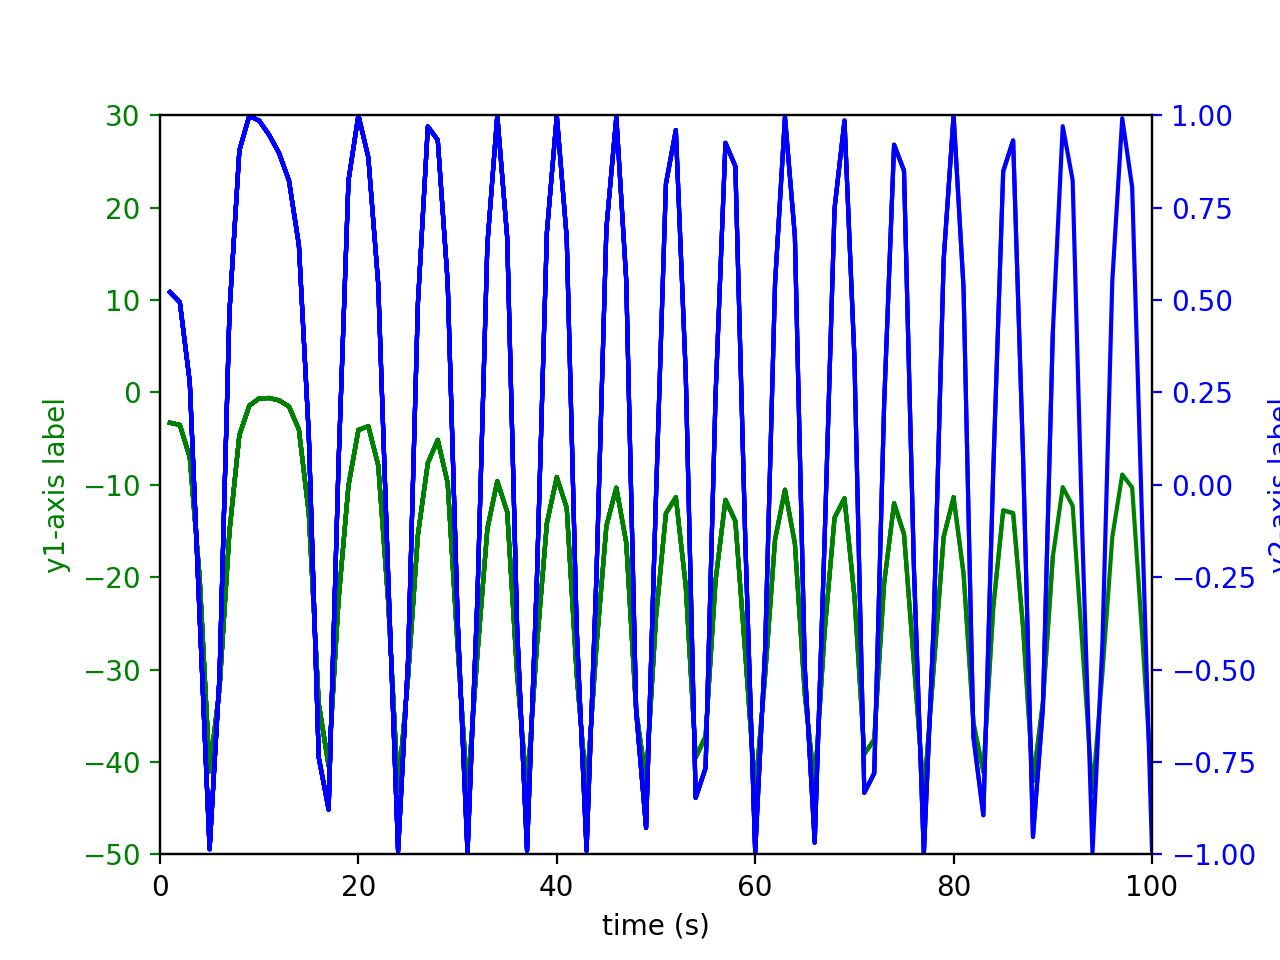

Episode =   50, total reward = -2161.287
Episode =   51, total reward = -2288.524
Episode =   52, total reward = -2422.116
Episode =   53, total reward = -2451.475
Episode =   54, total reward = -2268.501
Episode =   55, total reward = -2382.081
Episode =   56, total reward = -2339.992
Episode =   57, total reward = -2381.020
Episode =   58, total reward = -2482.009
Episode =   59, total reward = -2477.124
Episode =   60, total reward = -2415.079
Episode =   61, total reward = -2360.490
Episode =   62, total reward = -2337.209
Episode =   63, total reward = -2191.730
Episode =   64, total reward = -2459.875
Episode =   65, total reward = -2388.473
Episode =   66, total reward = -2429.446
Episode =   67, total reward = -2477.987
Episode =   68, total reward = -2342.107
Episode =   69, total reward = -2338.123
Episode =   70, total reward = -2485.528
Episode =   71, total reward = -2490.922
Episode =   72, total reward = -2451.823
Episode =   73, total reward = -2429.866
Episode =   74, 

<IPython.core.display.Javascript object>


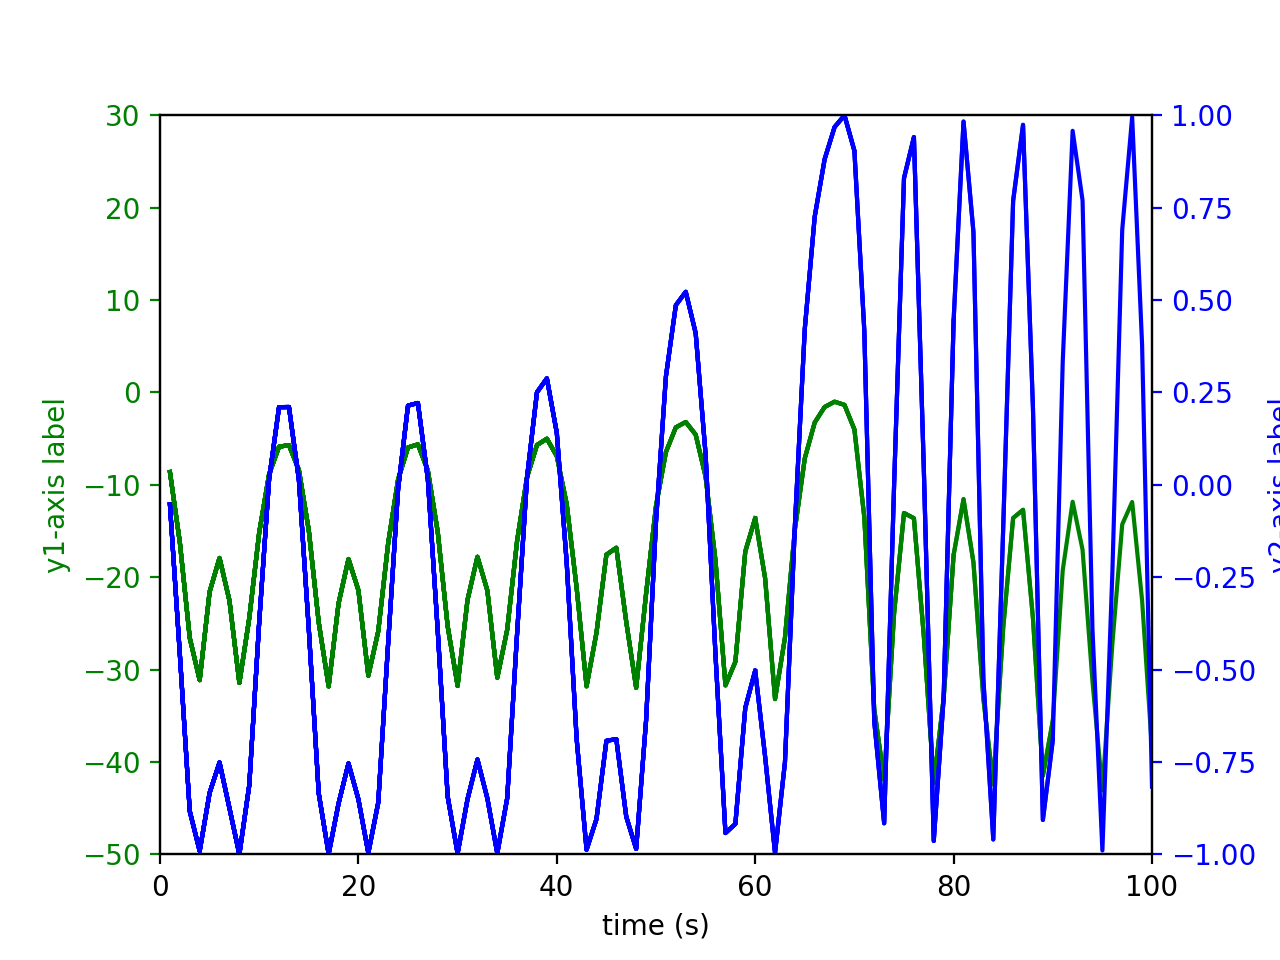

Episode =  100, total reward = -1973.971
Episode =  101, total reward = -2292.098
Episode =  102, total reward = -2435.518
Episode =  103, total reward = -2467.407
Episode =  104, total reward = -2281.939
Episode =  105, total reward = -2358.132
Episode =  106, total reward = -1478.894
Episode =  107, total reward = -1773.778
Episode =  108, total reward = -1850.837
Episode =  109, total reward = -2048.874
Episode =  110, total reward = -1918.136
Episode =  111, total reward = -2385.114
Episode =  112, total reward = -2315.086
Episode =  113, total reward = -2046.162
Episode =  114, total reward = -2457.794
Episode =  115, total reward = -2413.452
Episode =  116, total reward = -1905.562
Episode =  117, total reward = -2305.648
Episode =  118, total reward = -2349.960
Episode =  119, total reward = -2242.310
Episode =  120, total reward = -1956.498
Episode =  121, total reward = -2209.181
Episode =  122, total reward = -2302.611
Episode =  123, total reward = -2267.242
Episode =  124, 

<IPython.core.display.Javascript object>


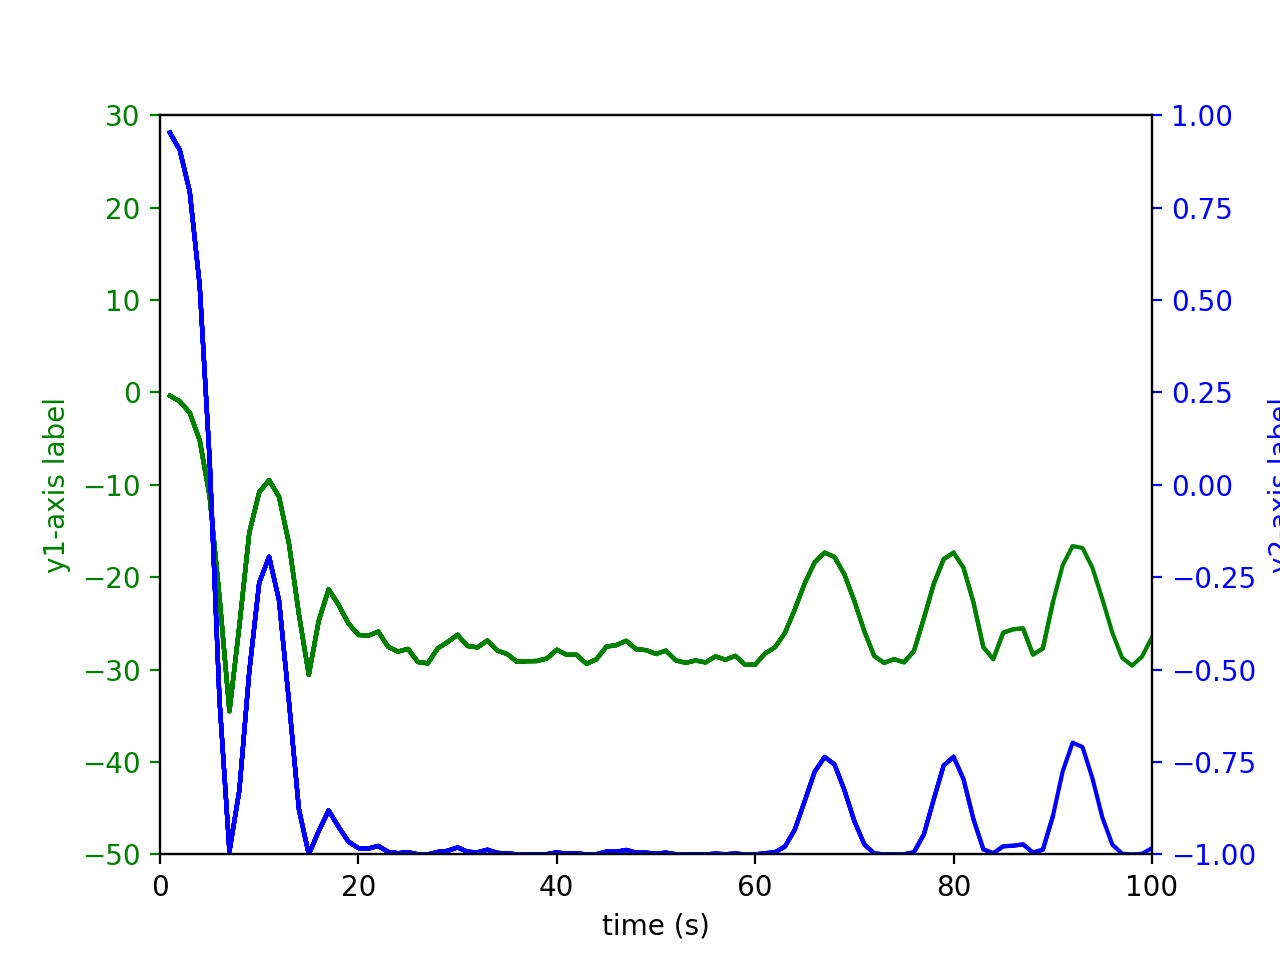

Episode =  150, total reward = -2449.946
Episode =  151, total reward = -2219.029
Episode =  152, total reward = -2482.543
Episode =  153, total reward = -1789.918
Episode =  154, total reward = -2060.890
Episode =  155, total reward = -2300.602
Episode =  156, total reward = -2279.187
Episode =  157, total reward = -2305.185
Episode =  158, total reward = -2452.472
Episode =  159, total reward = -2320.393
Episode =  160, total reward = -2298.773
Episode =  161, total reward = -2305.692
Episode =  162, total reward = -2277.466
Episode =  163, total reward = -2365.744
Episode =  164, total reward = -2095.748
Episode =  165, total reward = -2298.985
Episode =  166, total reward = -2309.238
Episode =  167, total reward = -2323.119
Episode =  168, total reward = -2266.225
Episode =  169, total reward = -2361.593
Episode =  170, total reward = -2359.604
Episode =  171, total reward = -2474.798
Episode =  172, total reward = -2453.808
Episode =  173, total reward = -2404.156
Episode =  174, 

<IPython.core.display.Javascript object>


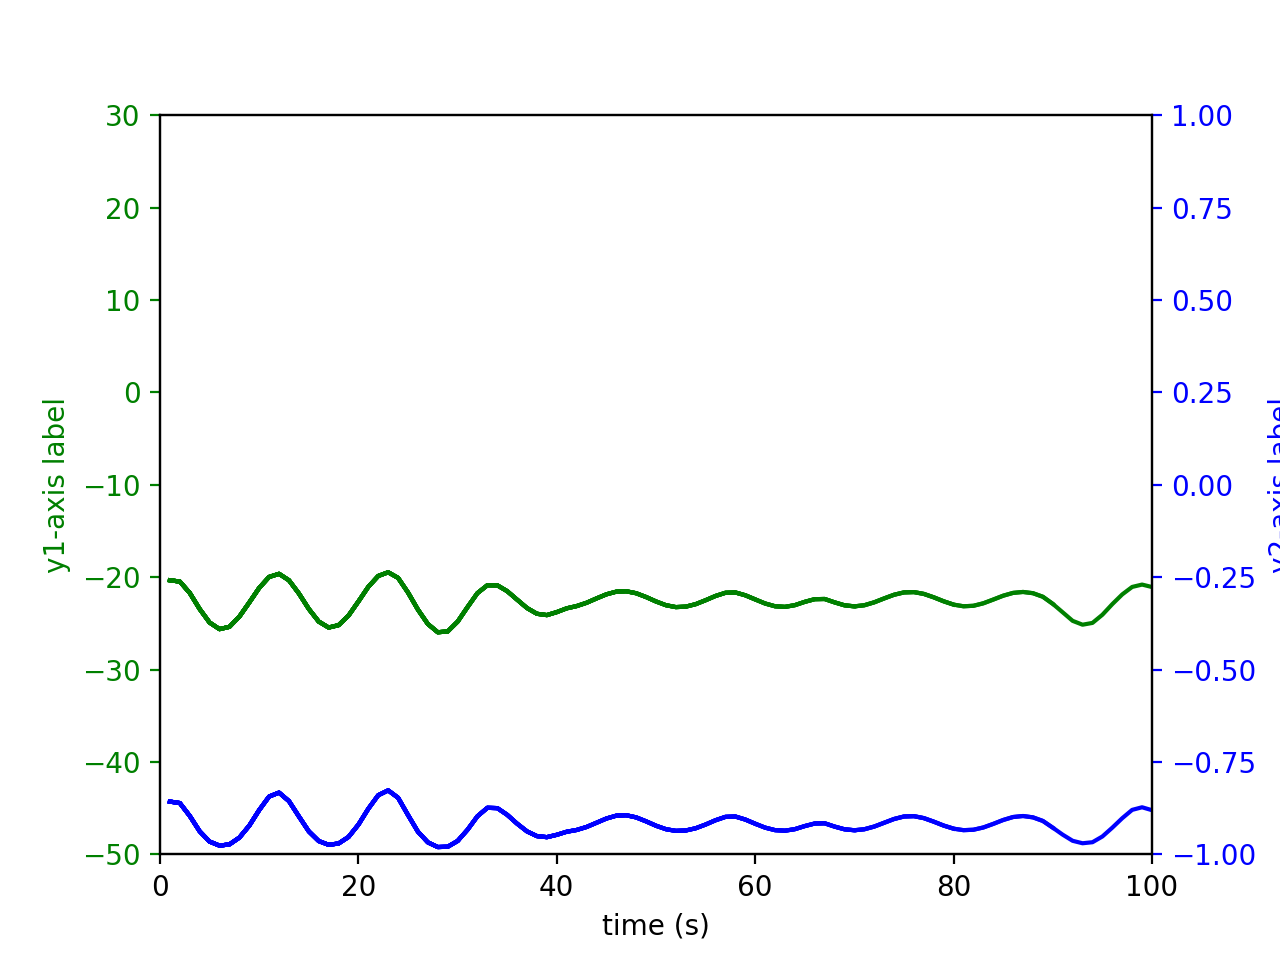

Episode =  200, total reward = -2285.075
Episode =  201, total reward = -2142.785
Episode =  202, total reward = -2227.448
Episode =  203, total reward = -1733.298
Episode =  204, total reward = -2341.219
Episode =  205, total reward = -2394.270
Episode =  206, total reward = -2375.250
Episode =  207, total reward = -2387.495
Episode =  208, total reward = -2329.316
Episode =  209, total reward = -2316.558
Episode =  210, total reward = -1939.806
Episode =  211, total reward = -2464.379
Episode =  212, total reward = -2478.287
Episode =  213, total reward = -1641.709
Episode =  214, total reward = -2438.204
Episode =  215, total reward = -1998.954
Episode =  216, total reward = -2450.044
Episode =  217, total reward = -1816.301
Episode =  218, total reward = -2210.409
Episode =  219, total reward = -2009.436
Episode =  220, total reward = -1897.955
Episode =  221, total reward = -1764.767
Episode =  222, total reward = -2480.513
Episode =  223, total reward = -2437.245
Episode =  224, 

<IPython.core.display.Javascript object>


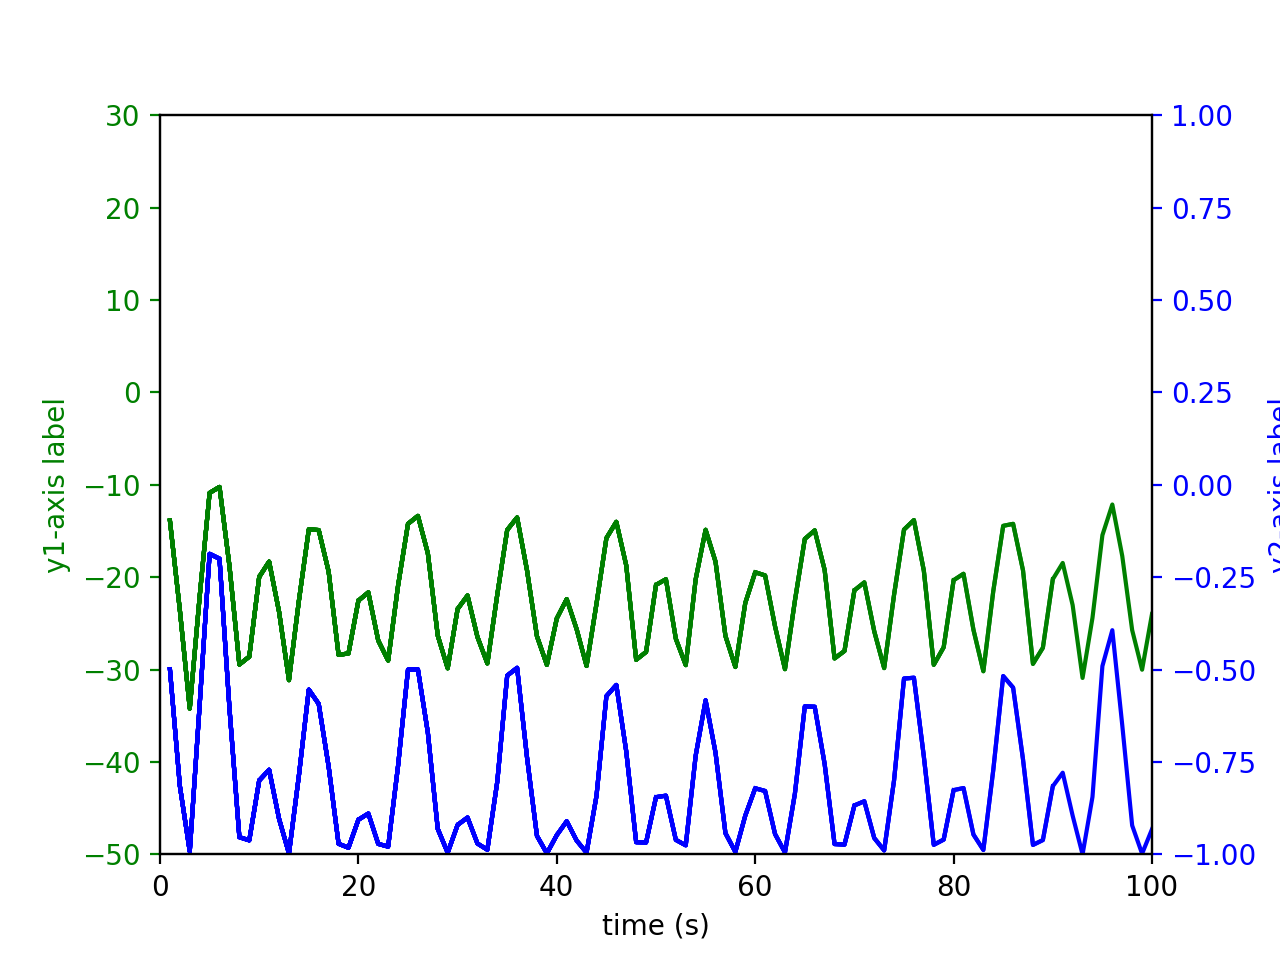

Episode =  250, total reward = -2256.972
Episode =  251, total reward = -2090.851
Episode =  252, total reward = -2302.486
Episode =  253, total reward = -2245.105
Episode =  254, total reward = -2322.201
Episode =  255, total reward = -2295.459
Episode =  256, total reward = -2229.924
Episode =  257, total reward = -2241.221
Episode =  258, total reward = -2250.426
Episode =  259, total reward = -2315.243
Episode =  260, total reward = -2284.548
Episode =  261, total reward = -2237.057
Episode =  262, total reward = -2308.629
Episode =  263, total reward = -2341.875
Episode =  264, total reward = -2293.530
Episode =  265, total reward = -2279.602
Episode =  266, total reward = -2290.659
Episode =  267, total reward = -2256.652
Episode =  268, total reward = -2174.439
Episode =  269, total reward = -2158.482
Episode =  270, total reward = -2165.586
Episode =  271, total reward = -2470.854
Episode =  272, total reward = -2494.137
Episode =  273, total reward = -2417.943
Episode =  274, 

<IPython.core.display.Javascript object>


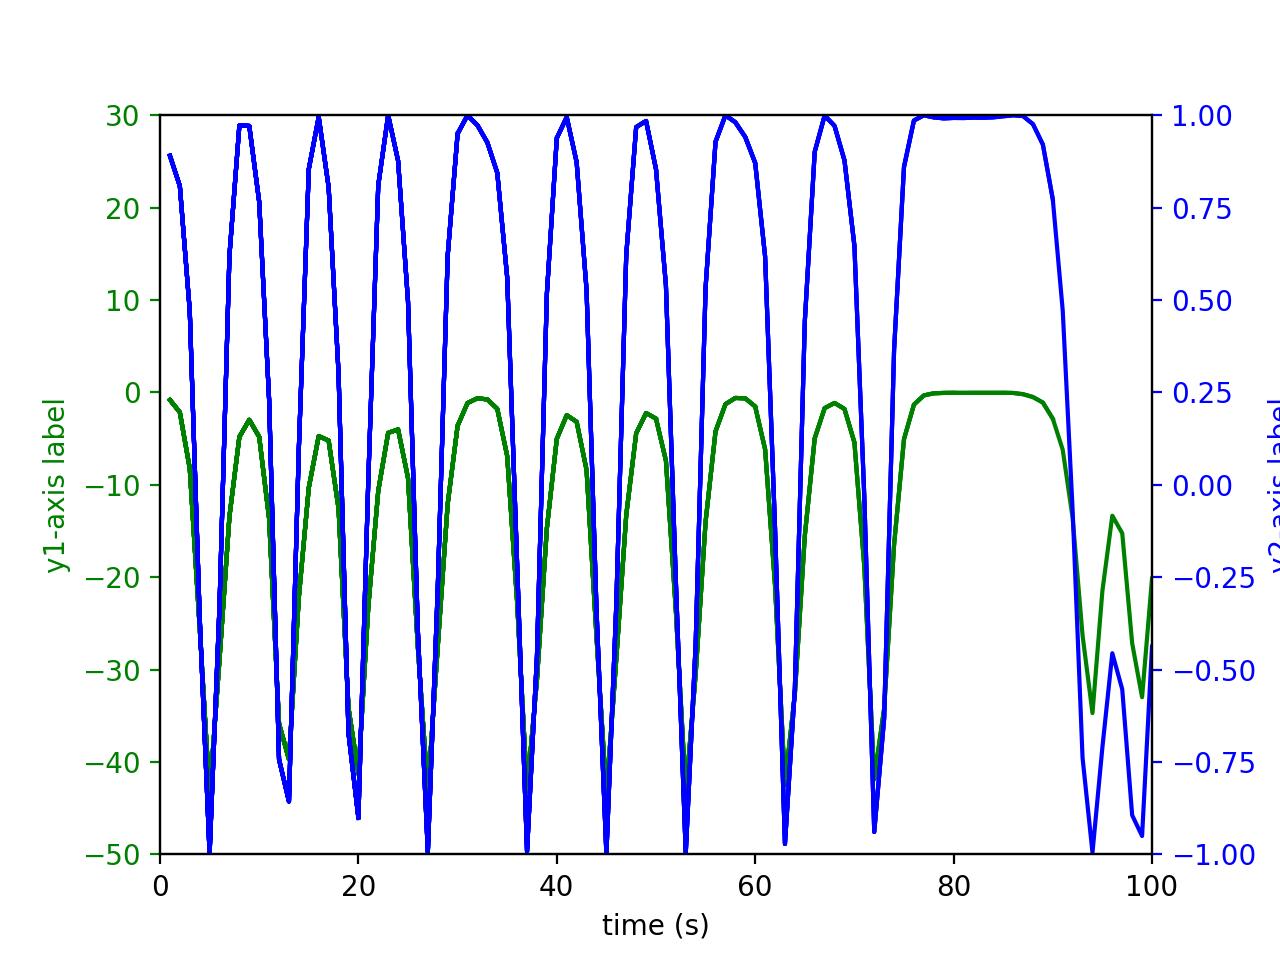

Episode =  300, total reward = -1387.299
Episode =  301, total reward = -1905.369
Episode =  302, total reward = -1584.636
Episode =  303, total reward = -1672.703
Episode =  304, total reward = -1887.386
Episode =  305, total reward = -1985.779
Episode =  306, total reward = -1899.577
Episode =  307, total reward = -1721.927
Episode =  308, total reward = -1911.183
Episode =  309, total reward = -1903.356
Episode =  310, total reward = -1623.813
Episode =  311, total reward = -1900.511
Episode =  312, total reward = -2107.655
Episode =  313, total reward = -1943.663
Episode =  314, total reward = -1995.500
Episode =  315, total reward = -1903.154
Episode =  316, total reward = -1911.770
Episode =  317, total reward = -1981.192
Episode =  318, total reward = -2019.560
Episode =  319, total reward = -1893.414
Episode =  320, total reward = -1801.687
Episode =  321, total reward = -2087.936
Episode =  322, total reward = -2046.438
Episode =  323, total reward = -1966.340
Episode =  324, 

<IPython.core.display.Javascript object>


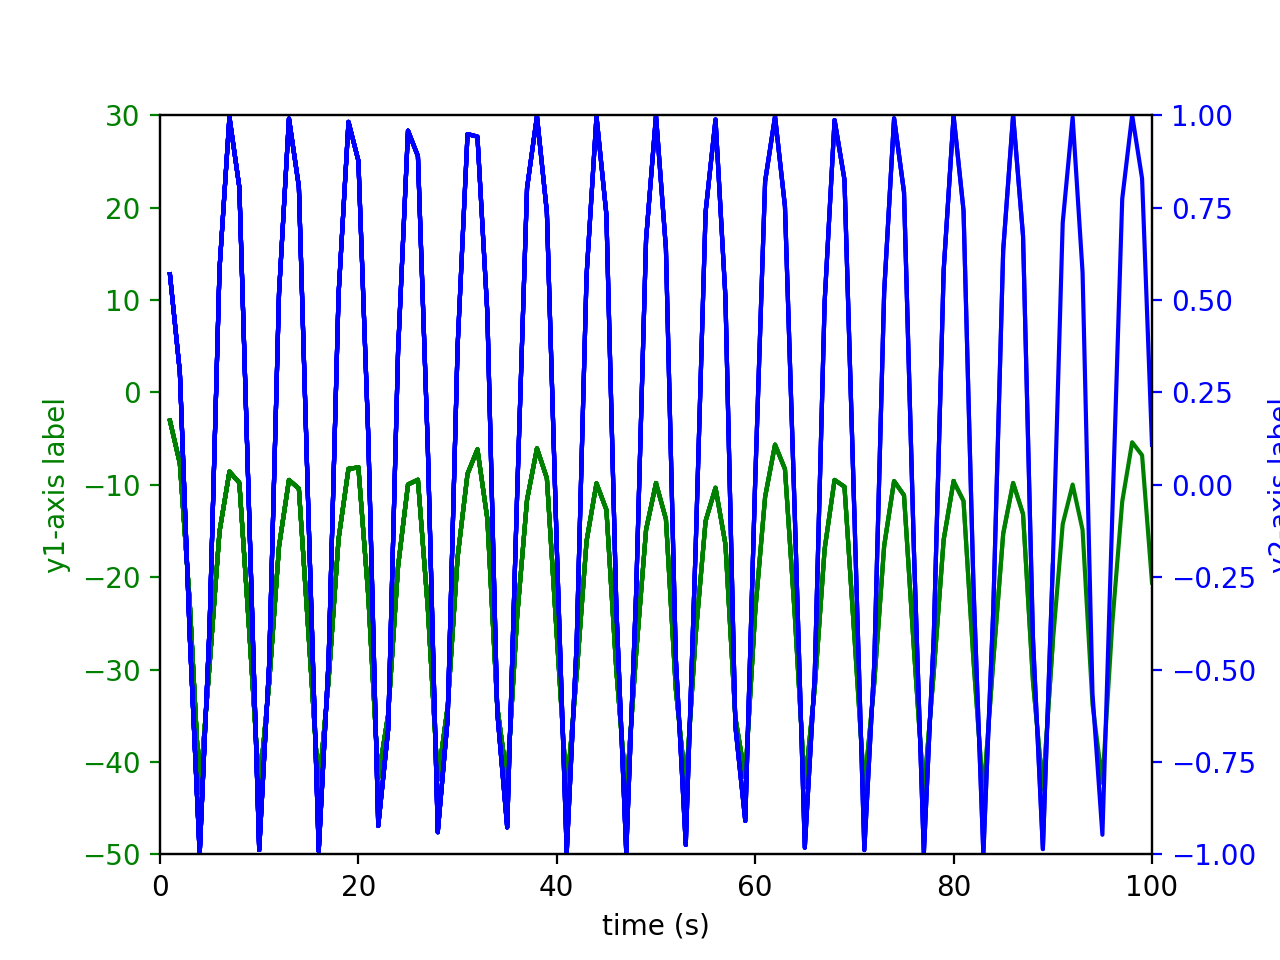

Episode =  350, total reward = -2246.209
Episode =  351, total reward = -1806.970
Episode =  352, total reward = -1957.108
Episode =  353, total reward = -1878.366
Episode =  354, total reward = -2247.920
Episode =  355, total reward = -1806.759
Episode =  356, total reward = -2332.031
Episode =  357, total reward = -2166.420
Episode =  358, total reward = -2088.035
Episode =  359, total reward = -2468.042
Episode =  360, total reward = -2044.249
Episode =  361, total reward = -1988.844
Episode =  362, total reward = -1763.548
Episode =  363, total reward = -2458.290
Episode =  364, total reward = -1901.506
Episode =  365, total reward = -2035.844
Episode =  366, total reward = -2217.203
Episode =  367, total reward = -2191.896
Episode =  368, total reward = -2296.636
Episode =  369, total reward = -2193.461
Episode =  370, total reward = -1824.217
Episode =  371, total reward = -2456.469
Episode =  372, total reward = -2484.631
Episode =  373, total reward = -2148.094
Episode =  374, 

<IPython.core.display.Javascript object>


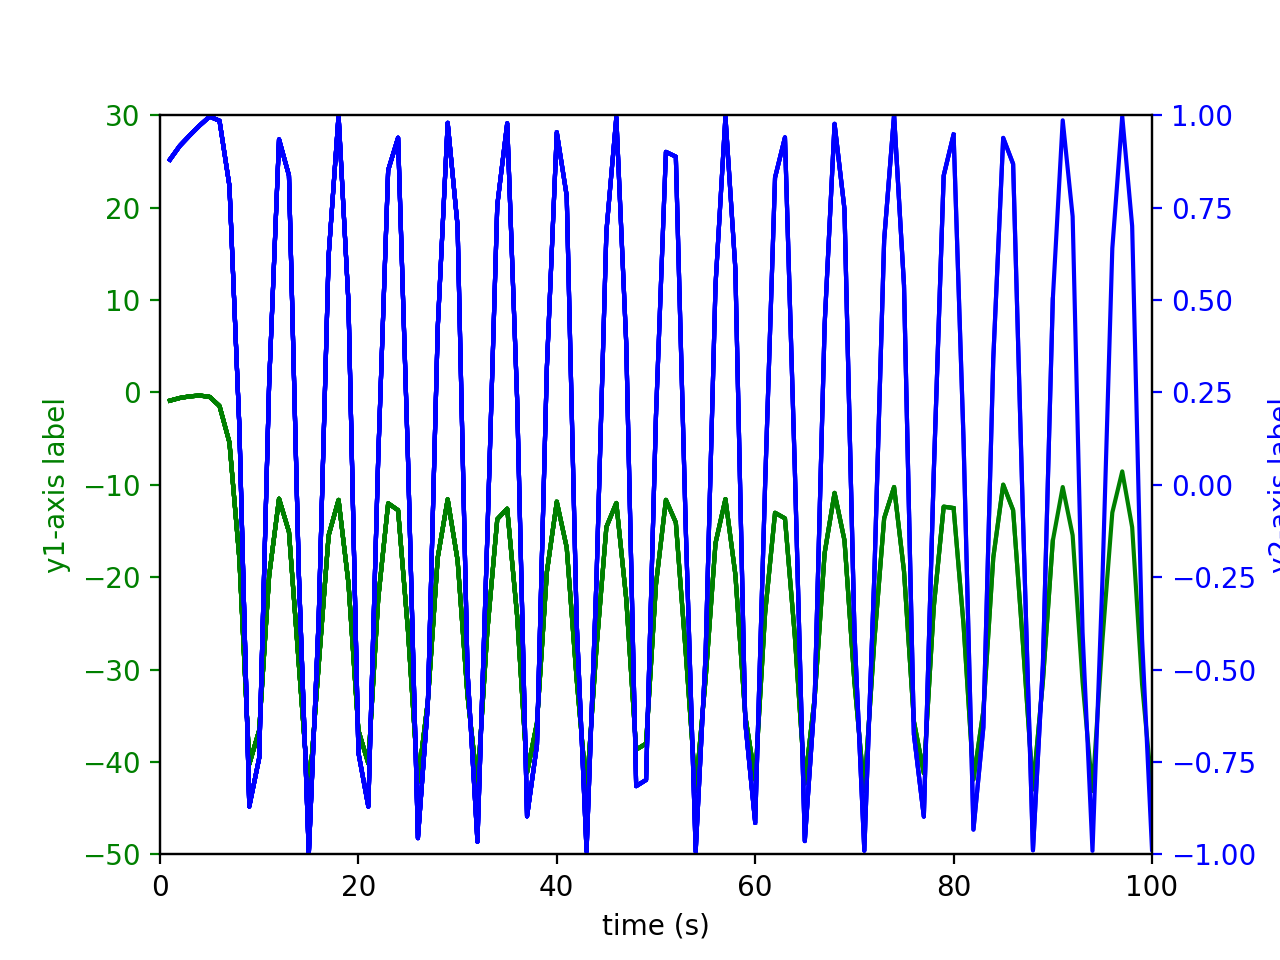

Episode =  400, total reward = -2342.367
Episode =  401, total reward = -1890.578
Episode =  402, total reward = -1902.972
Episode =  403, total reward = -2293.950
Episode =  404, total reward = -1924.242
Episode =  405, total reward = -2496.270
Episode =  406, total reward = -1770.157
Episode =  407, total reward = -2134.406
Episode =  408, total reward = -1988.688
Episode =  409, total reward = -2455.355
Episode =  410, total reward = -1773.699
Episode =  411, total reward = -2442.694
Episode =  412, total reward = -1736.409
Episode =  413, total reward = -1945.208
Episode =  414, total reward = -2442.181
Episode =  415, total reward = -2470.726
Episode =  416, total reward = -1874.106
Episode =  417, total reward = -2268.813
Episode =  418, total reward = -1835.724
Episode =  419, total reward = -2322.248
Episode =  420, total reward = -2386.354
Episode =  421, total reward = -2457.331
Episode =  422, total reward = -2468.793
Episode =  423, total reward = -1964.680
Episode =  424, 

<IPython.core.display.Javascript object>


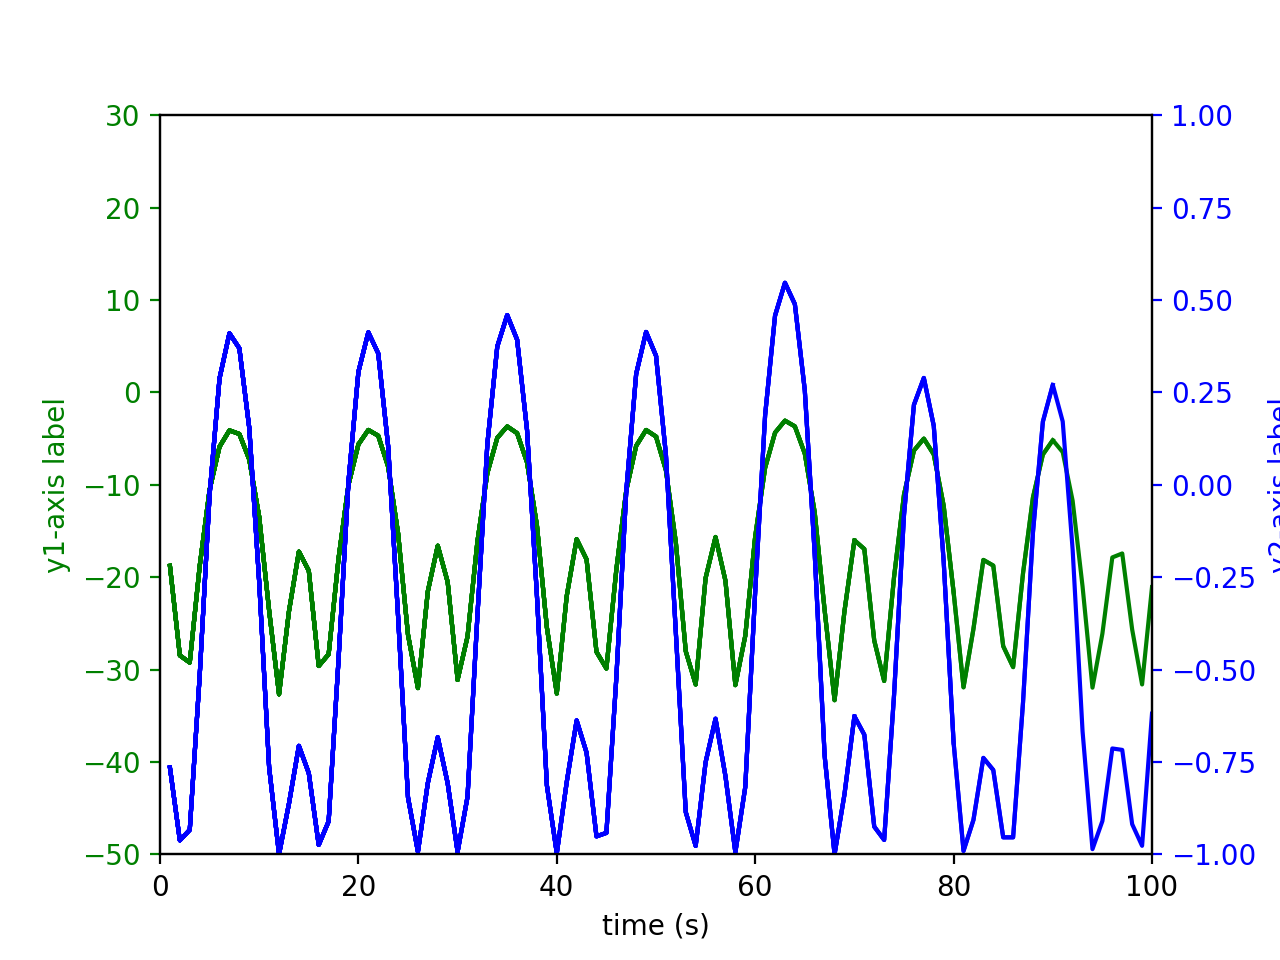

Episode =  450, total reward = -1756.371
Episode =  451, total reward = -1847.081
Episode =  452, total reward = -1754.193
Episode =  453, total reward = -2419.158
Episode =  454, total reward = -1761.558
Episode =  455, total reward = -1770.362
Episode =  456, total reward = -1912.907
Episode =  457, total reward = -1765.902
Episode =  458, total reward = -2309.197
Episode =  459, total reward = -1829.434
Episode =  460, total reward = -1751.550
Episode =  461, total reward = -2159.769
Episode =  462, total reward = -2214.009
Episode =  463, total reward = -2221.216
Episode =  464, total reward = -2163.415
Episode =  465, total reward = -2315.392
Episode =  466, total reward = -2464.162
Episode =  467, total reward = -2338.722
Episode =  468, total reward = -2298.870
Episode =  469, total reward = -2178.003
Episode =  470, total reward = -2481.294
Episode =  471, total reward = -2480.728
Episode =  472, total reward = -2310.627
Episode =  473, total reward = -2290.294
Episode =  474, 

<IPython.core.display.Javascript object>


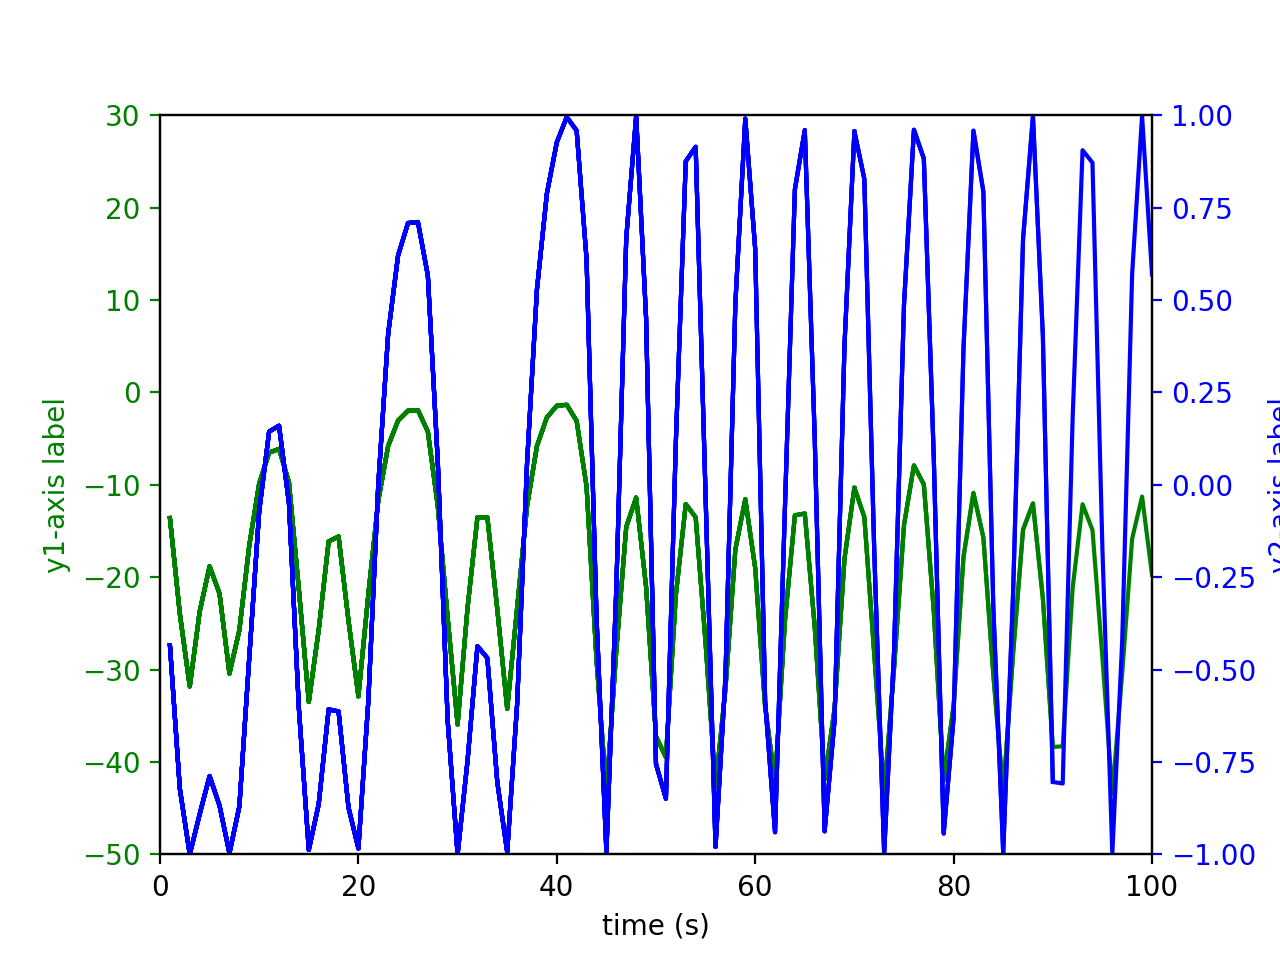

Episode =  500, total reward = -2130.061
Episode =  501, total reward = -2010.900
Episode =  502, total reward = -2372.936
Episode =  503, total reward = -2477.018
Episode =  504, total reward = -2184.895
Episode =  505, total reward = -2165.932
Episode =  506, total reward = -2201.892
Episode =  507, total reward = -2479.013
Episode =  508, total reward = -2389.090
Episode =  509, total reward = -2473.805
Episode =  510, total reward = -2291.260
Episode =  511, total reward = -2486.646
Episode =  512, total reward = -2439.166
Episode =  513, total reward = -2468.624
Episode =  514, total reward = -2436.004
Episode =  515, total reward = -2464.718
Episode =  516, total reward = -2482.406
Episode =  517, total reward = -2227.168
Episode =  518, total reward = -2395.158
Episode =  519, total reward = -2397.285
Episode =  520, total reward = -2479.052
Episode =  521, total reward = -2193.750
Episode =  522, total reward = -2451.917
Episode =  523, total reward = -2099.486
Episode =  524, 

<IPython.core.display.Javascript object>


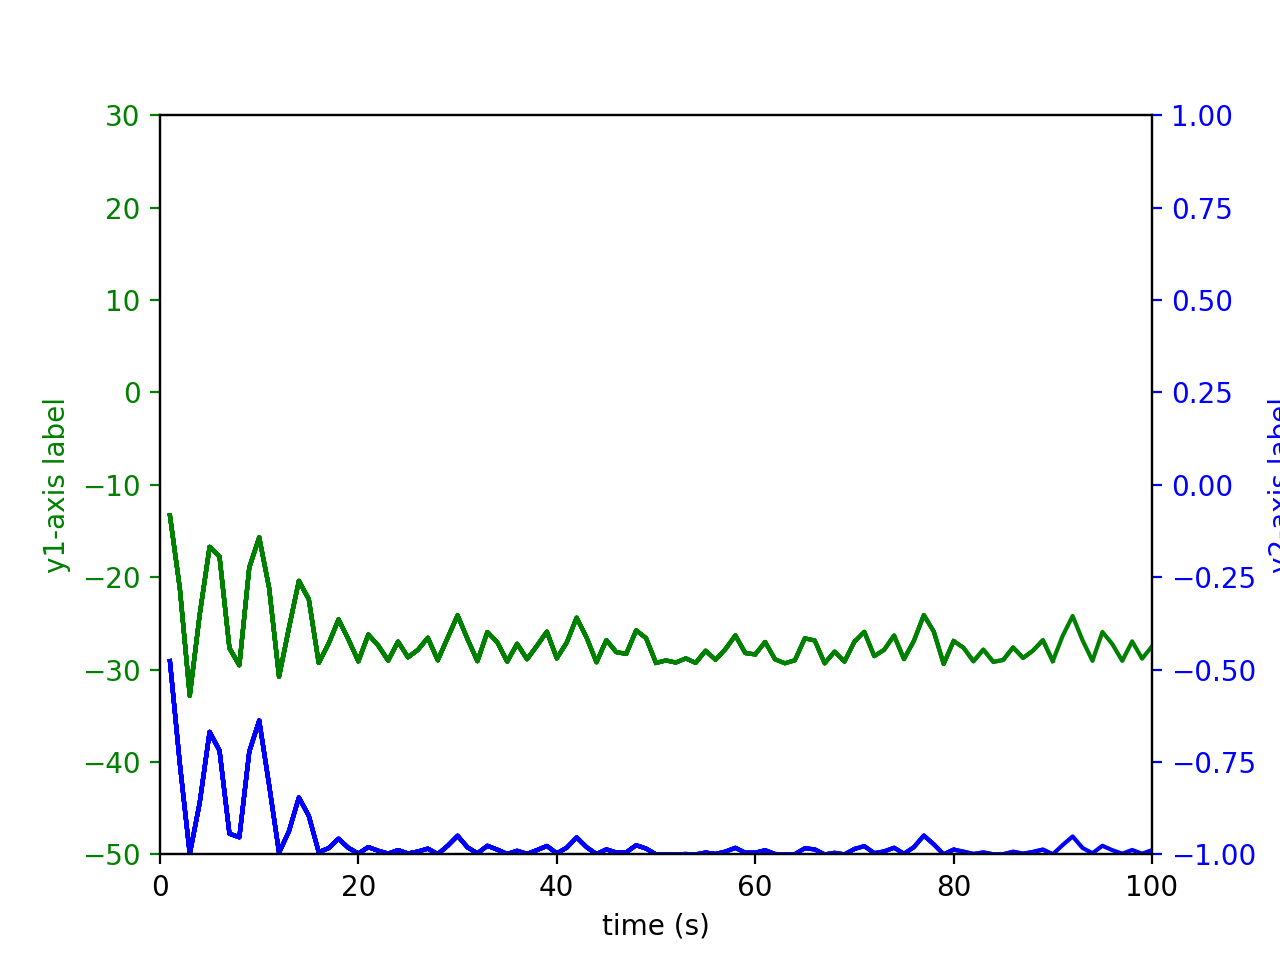

Episode =  550, total reward = -2711.260
Episode =  551, total reward = -2719.842
Episode =  552, total reward = -2592.217
Episode =  553, total reward = -2698.795
Episode =  554, total reward = -2699.904
Episode =  555, total reward = -2574.203
Episode =  556, total reward = -2476.678
Episode =  557, total reward = -2794.226
Episode =  558, total reward = -2766.233
Episode =  559, total reward = -2633.606
Episode =  560, total reward = -1431.591
Episode =  561, total reward = -2354.621
Episode =  562, total reward = -2147.023
Episode =  563, total reward = -1938.566
Episode =  564, total reward = -1716.671
Episode =  565, total reward = -1954.029
Episode =  566, total reward = -2007.082
Episode =  567, total reward = -1969.432
Episode =  568, total reward = -2249.854
Episode =  569, total reward = -1757.339
Episode =  570, total reward = -2345.829
Episode =  571, total reward = -1807.457
Episode =  572, total reward = -1956.134
Episode =  573, total reward = -1637.461
Episode =  574, 

<IPython.core.display.Javascript object>


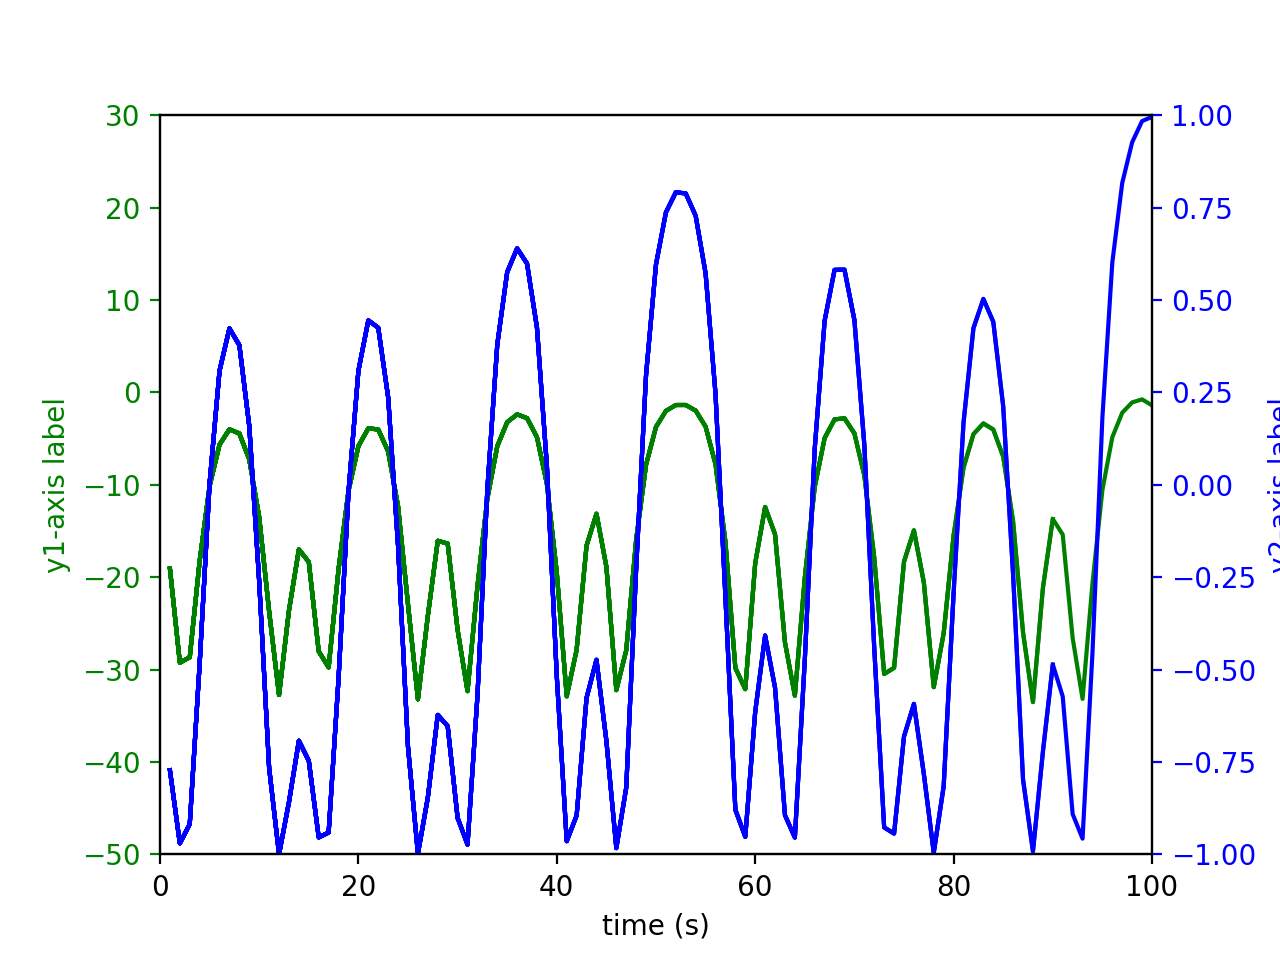

Episode =  600, total reward = -1543.097
Episode =  601, total reward = -2325.754
Episode =  602, total reward = -2359.393
Episode =  603, total reward = -2407.343
Episode =  604, total reward = -2453.059
Episode =  605, total reward = -1700.483
Episode =  606, total reward = -2457.182
Episode =  607, total reward = -2329.692
Episode =  608, total reward = -2385.257
Episode =  609, total reward = -2109.898
Episode =  610, total reward = -2309.333
Episode =  611, total reward = -2449.500
Episode =  612, total reward = -1581.583
Episode =  613, total reward = -2294.483
Episode =  614, total reward = -2449.137
Episode =  615, total reward = -1791.675
Episode =  616, total reward = -2467.032
Episode =  617, total reward = -1744.252
Episode =  618, total reward = -2393.281
Episode =  619, total reward = -1882.596
Episode =  620, total reward = -2044.839
Episode =  621, total reward = -1826.107
Episode =  622, total reward = -2465.142
Episode =  623, total reward = -2444.088
Episode =  624, 

<IPython.core.display.Javascript object>


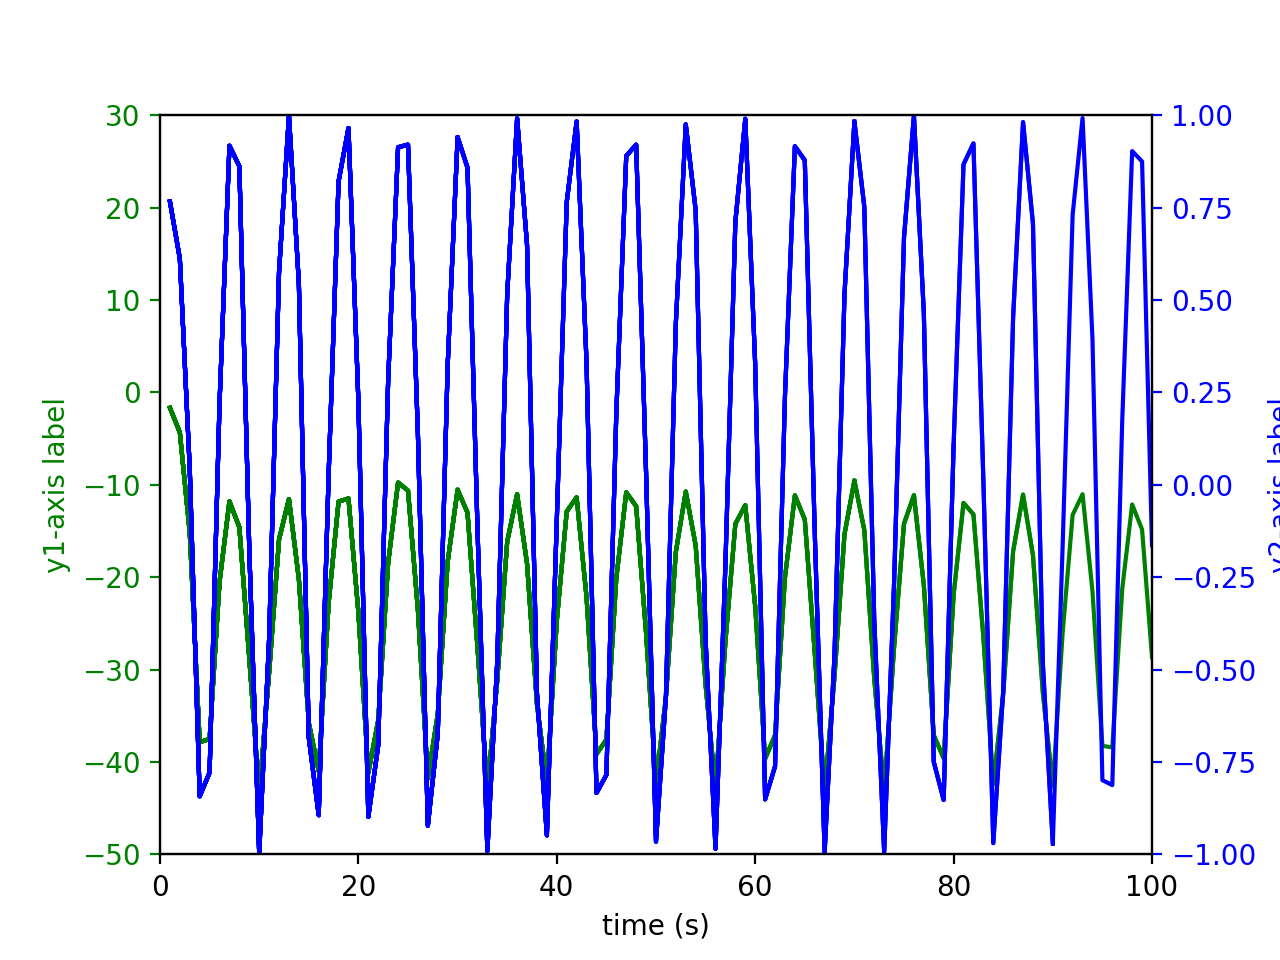

Episode =  650, total reward = -2436.064
Episode =  651, total reward = -2492.690
Episode =  652, total reward = -2463.588
Episode =  653, total reward = -2186.644
Episode =  654, total reward = -2610.491
Episode =  655, total reward = -2580.595
Episode =  656, total reward = -2570.961
Episode =  657, total reward = -2567.780
Episode =  658, total reward = -2320.244
Episode =  659, total reward = -1966.237
Episode =  660, total reward = -2478.077
Episode =  661, total reward = -2485.056
Episode =  662, total reward = -1939.858
Episode =  663, total reward = -2490.891
Episode =  664, total reward = -2520.275
Episode =  665, total reward = -2100.869
Episode =  666, total reward = -2523.411
Episode =  667, total reward = -2373.751
Episode =  668, total reward = -2330.107
Episode =  669, total reward = -2484.482
Episode =  670, total reward = -2389.876
Episode =  671, total reward = -2445.619
Episode =  672, total reward = -2077.108
Episode =  673, total reward = -2329.028
Episode =  674, 

<IPython.core.display.Javascript object>


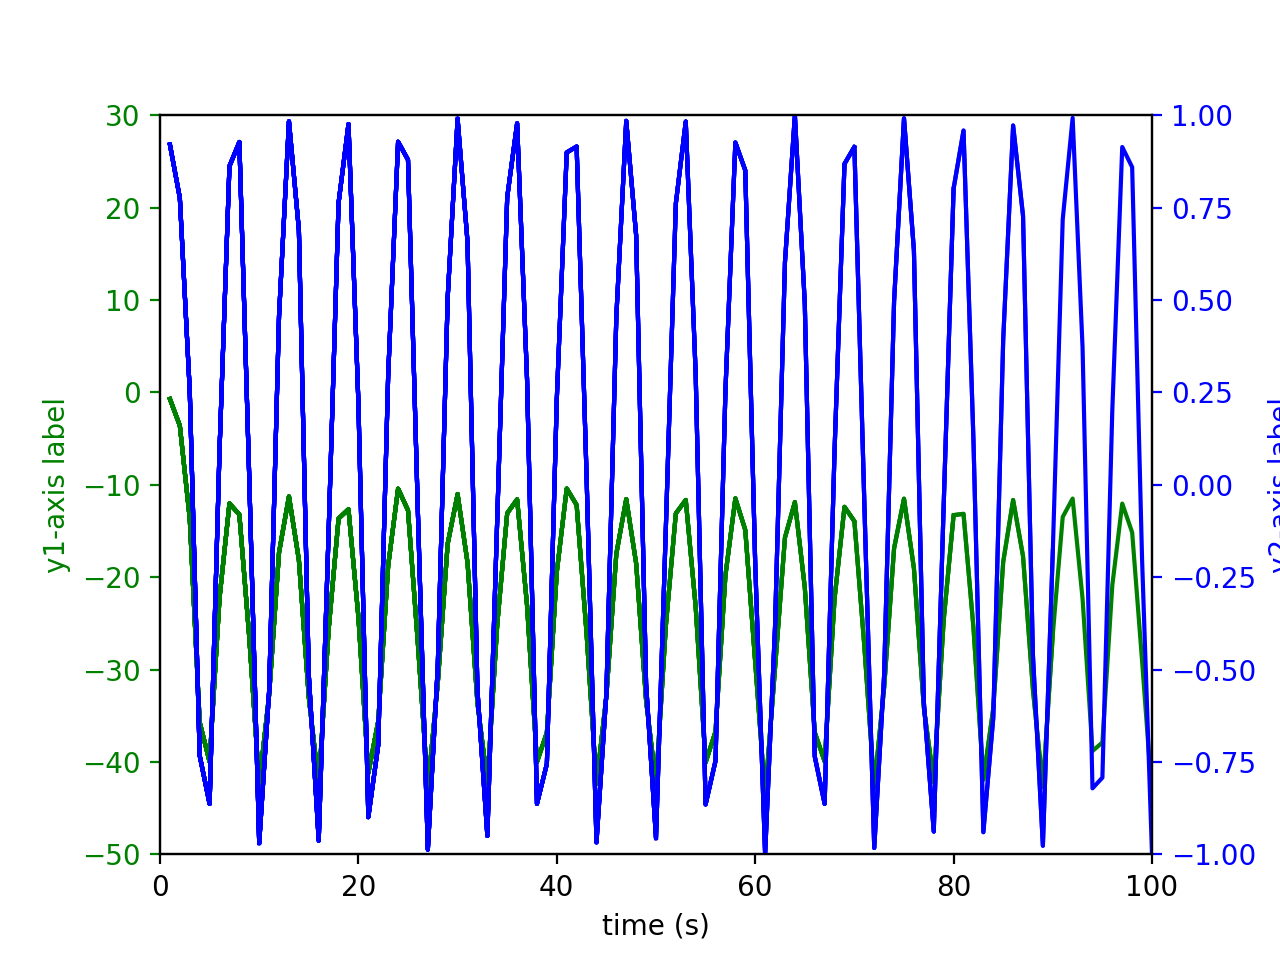

Episode =  700, total reward = -2474.179
Episode =  701, total reward = -2439.444
Episode =  702, total reward = -2337.495
Episode =  703, total reward = -2029.538
Episode =  704, total reward = -2355.286
Episode =  705, total reward = -2798.010
Episode =  706, total reward = -2555.735
Episode =  707, total reward = -2493.982
Episode =  708, total reward = -2656.935
Episode =  709, total reward = -2749.924
Episode =  710, total reward = -2795.255
Episode =  711, total reward = -2683.167
Episode =  712, total reward = -2562.753
Episode =  713, total reward = -2589.087
Episode =  714, total reward = -2428.322
Episode =  715, total reward = -2357.804
Episode =  716, total reward = -1976.707
Episode =  717, total reward = -2437.957
Episode =  718, total reward = -2030.513
Episode =  719, total reward = -2401.695
Episode =  720, total reward = -2081.628
Episode =  721, total reward = -2153.720
Episode =  722, total reward = -2313.301
Episode =  723, total reward = -2206.396
Episode =  724, 

<IPython.core.display.Javascript object>


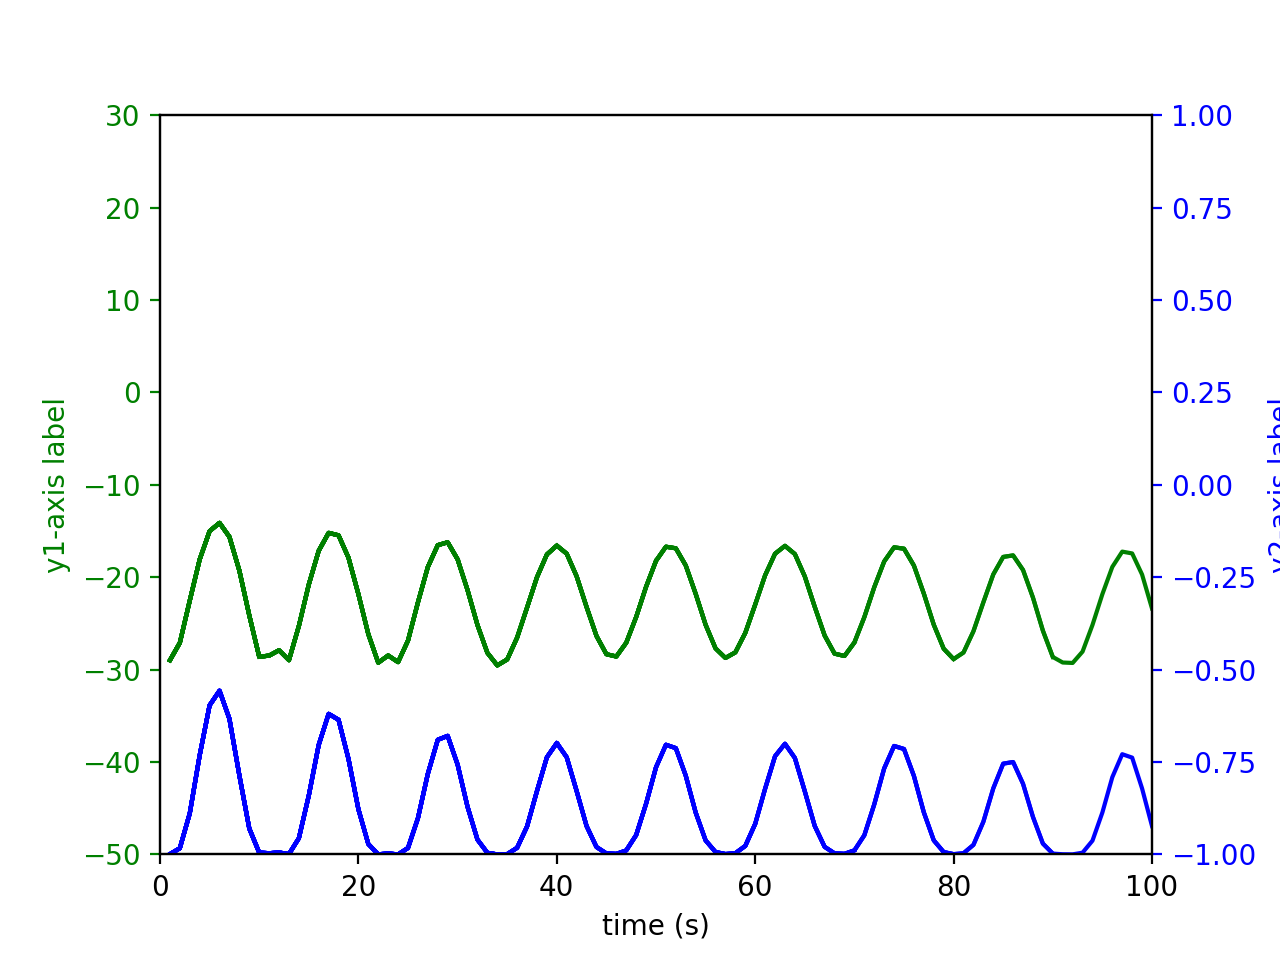

Episode =  750, total reward = -2299.082
Episode =  751, total reward = -2470.131
Episode =  752, total reward = -2246.477
Episode =  753, total reward = -2471.734
Episode =  754, total reward = -1624.813
Episode =  755, total reward = -2308.991
Episode =  756, total reward = -2433.805
Episode =  757, total reward = -2460.679
Episode =  758, total reward = -2025.427
Episode =  759, total reward = -2478.620
Episode =  760, total reward = -1615.446
Episode =  761, total reward = -2142.339
Episode =  762, total reward = -2450.404
Episode =  763, total reward = -1965.167
Episode =  764, total reward = -2411.919
Episode =  765, total reward = -2406.062
Episode =  766, total reward = -1896.713
Episode =  767, total reward = -1679.510
Episode =  768, total reward = -2269.101
Episode =  769, total reward = -2349.075
Episode =  770, total reward = -2221.368
Episode =  771, total reward = -1884.601
Episode =  772, total reward = -1882.422
Episode =  773, total reward = -2271.631
Episode =  774, 

<IPython.core.display.Javascript object>


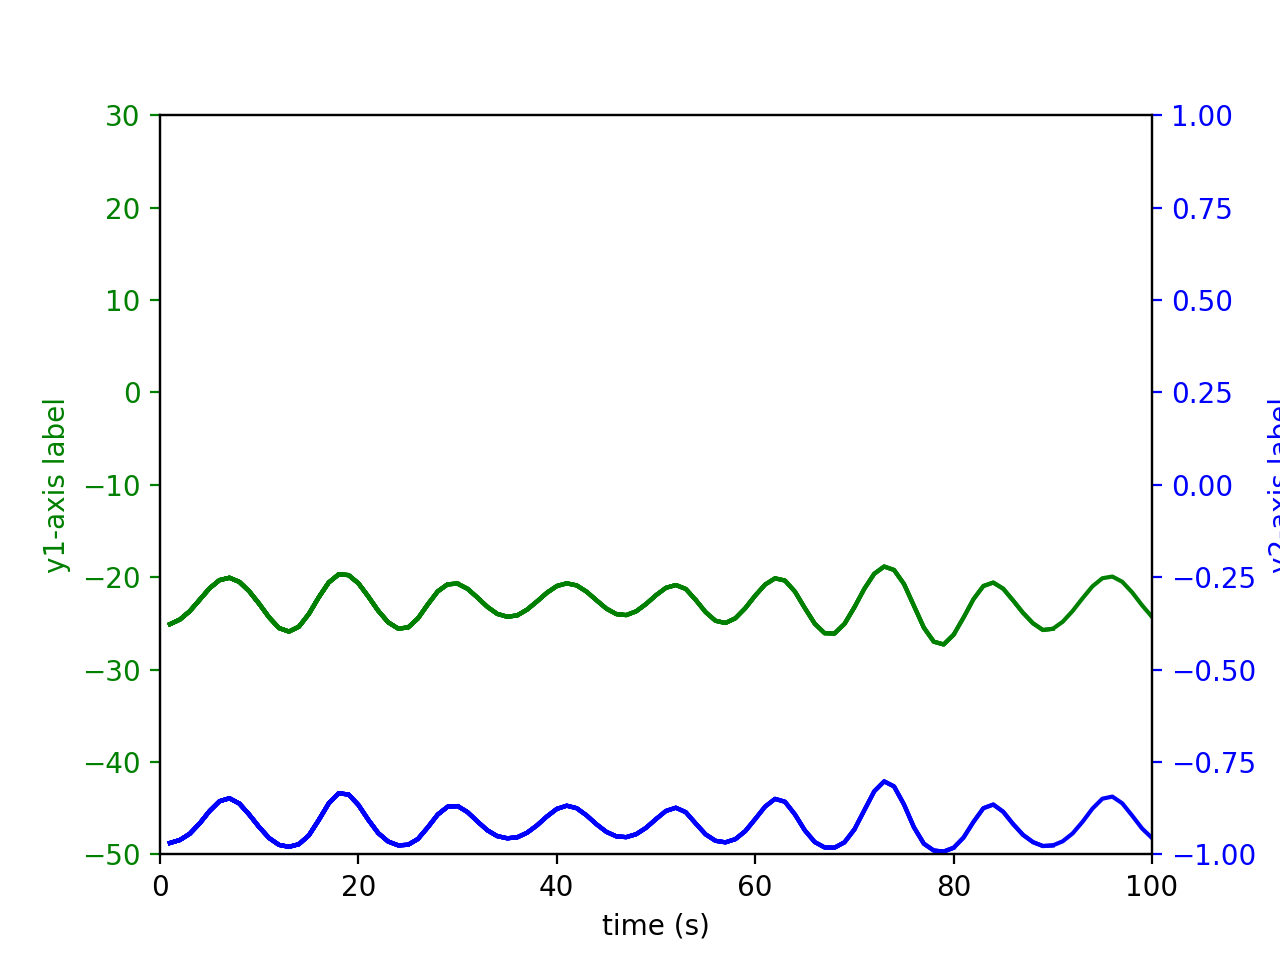

Episode =  800, total reward = -2303.582
Episode =  801, total reward = -2002.699
Episode =  802, total reward = -2166.667
Episode =  803, total reward = -2326.775
Episode =  804, total reward = -1580.100
Episode =  805, total reward = -2292.520
Episode =  806, total reward = -1894.614
Episode =  807, total reward = -1631.225
Episode =  808, total reward = -1088.751
Episode =  809, total reward = -1424.831
Episode =  810, total reward = -1616.831
Episode =  811, total reward = -1531.949
Episode =  812, total reward = -2080.402
Episode =  813, total reward = -2024.021
Episode =  814, total reward = -2318.777
Episode =  815, total reward = -1297.541
Episode =  816, total reward = -1548.231
Episode =  817, total reward = -2311.117
Episode =  818, total reward = -1299.493
Episode =  819, total reward = -2343.096
Episode =  820, total reward = -1935.106
Episode =  821, total reward = -1240.851
Episode =  822, total reward = -1411.652
Episode =  823, total reward = -1640.620
Episode =  824, 

<IPython.core.display.Javascript object>


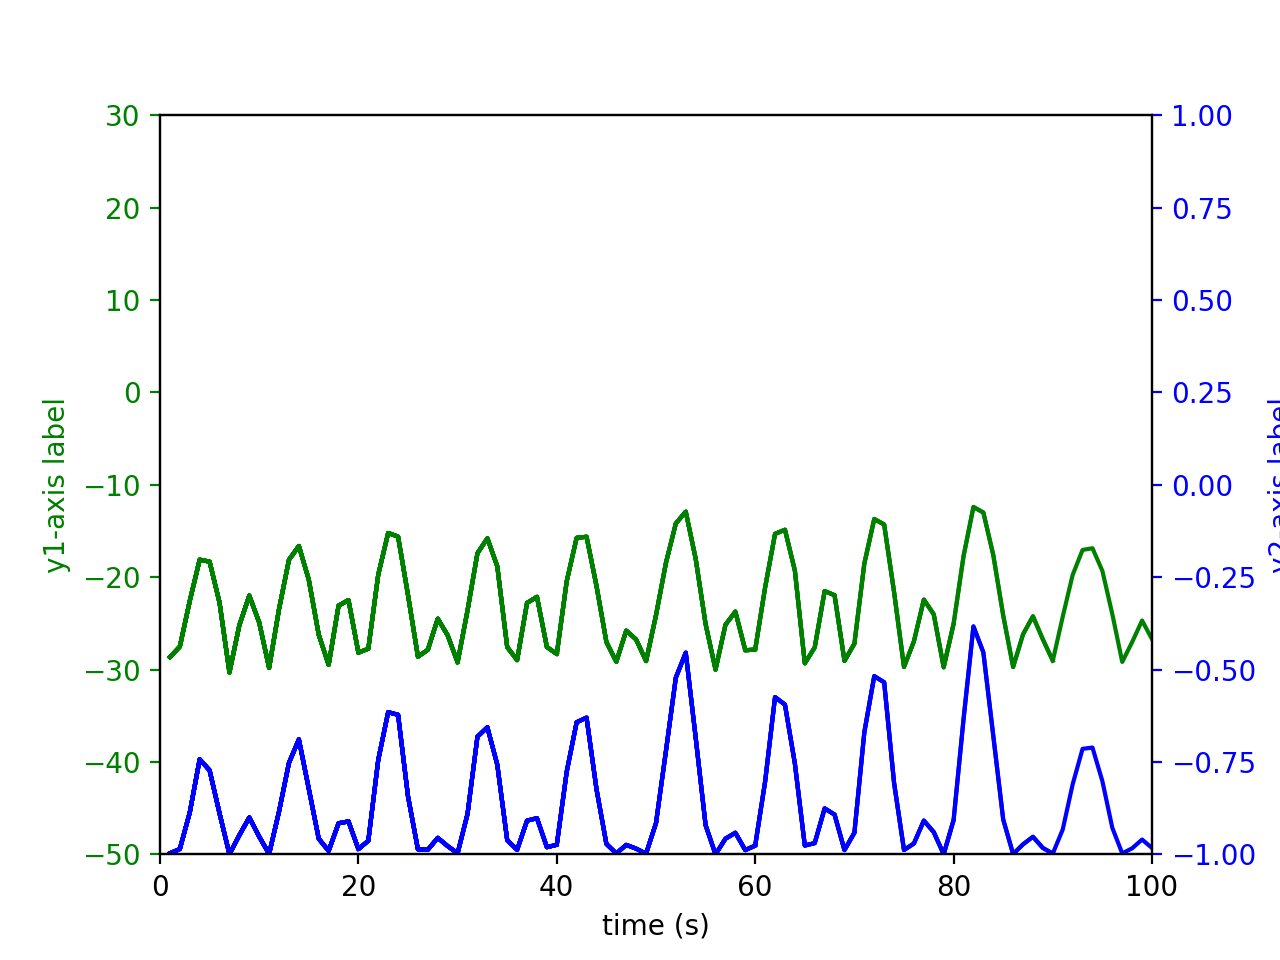

Episode =  850, total reward = -2337.411
Episode =  851, total reward = -2044.475
Episode =  852, total reward = -1741.460
Episode =  853, total reward = -1587.423
Episode =  854, total reward = -2070.752
Episode =  855, total reward = -2012.053
Episode =  856, total reward = -2249.622
Episode =  857, total reward = -2310.902
Episode =  858, total reward = -2291.209
Episode =  859, total reward = -1482.825
Episode =  860, total reward = -1457.513
Episode =  861, total reward = -1544.642
Episode =  862, total reward = -1688.615
Episode =  863, total reward = -1809.742
Episode =  864, total reward = -1746.714
Episode =  865, total reward = -1548.164
Episode =  866, total reward = -1734.938
Episode =  867, total reward = -1699.703
Episode =  868, total reward = -1341.349
Episode =  869, total reward = -2327.486
Episode =  870, total reward = -2480.050
Episode =  871, total reward = -1937.111
Episode =  872, total reward = -1909.868
Episode =  873, total reward = -1941.484
Episode =  874, 

<IPython.core.display.Javascript object>


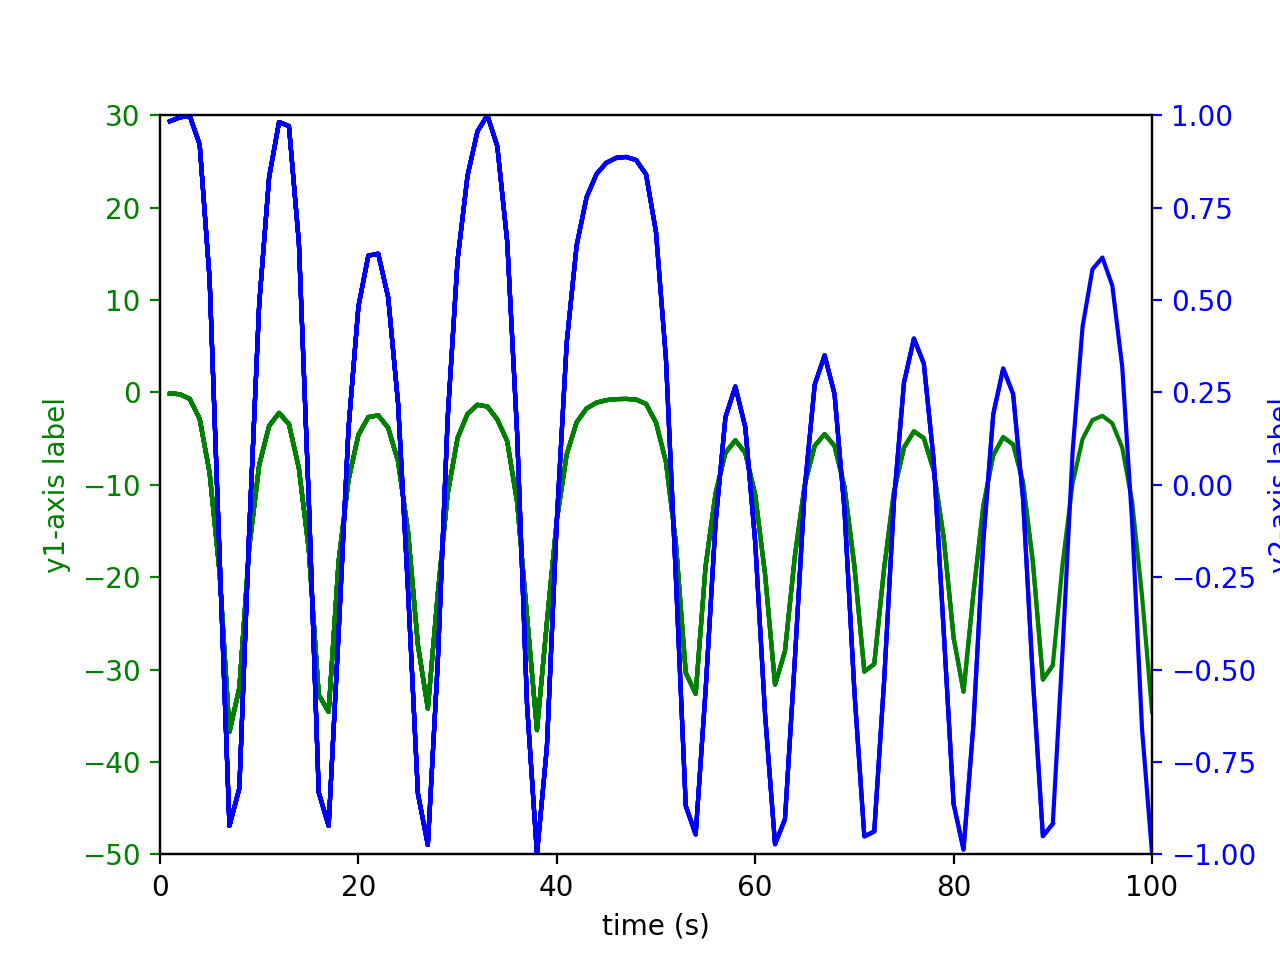

Episode =  900, total reward = -1304.470
Episode =  901, total reward = -1548.566
Episode =  902, total reward = -1301.271
Episode =  903, total reward = -1630.780
Episode =  904, total reward = -1441.252
Episode =  905, total reward = -1447.880
Episode =  906, total reward = -1637.586
Episode =  907, total reward = -1350.741
Episode =  908, total reward = -1159.671
Episode =  909, total reward = -1363.989
Episode =  910, total reward = -1465.888
Episode =  911, total reward = -1343.905
Episode =  912, total reward = -1362.443
Episode =  913, total reward = -1478.382
Episode =  914, total reward = -1321.563
Episode =  915, total reward = -1472.302
Episode =  916, total reward = -1420.573
Episode =  917, total reward = -1334.733
Episode =  918, total reward = -1371.038
Episode =  919, total reward = -1342.730
Episode =  920, total reward = -1214.658
Episode =  921, total reward = -1473.079
Episode =  922, total reward = -1364.201
Episode =  923, total reward = -1537.434
Episode =  924, 

<IPython.core.display.Javascript object>


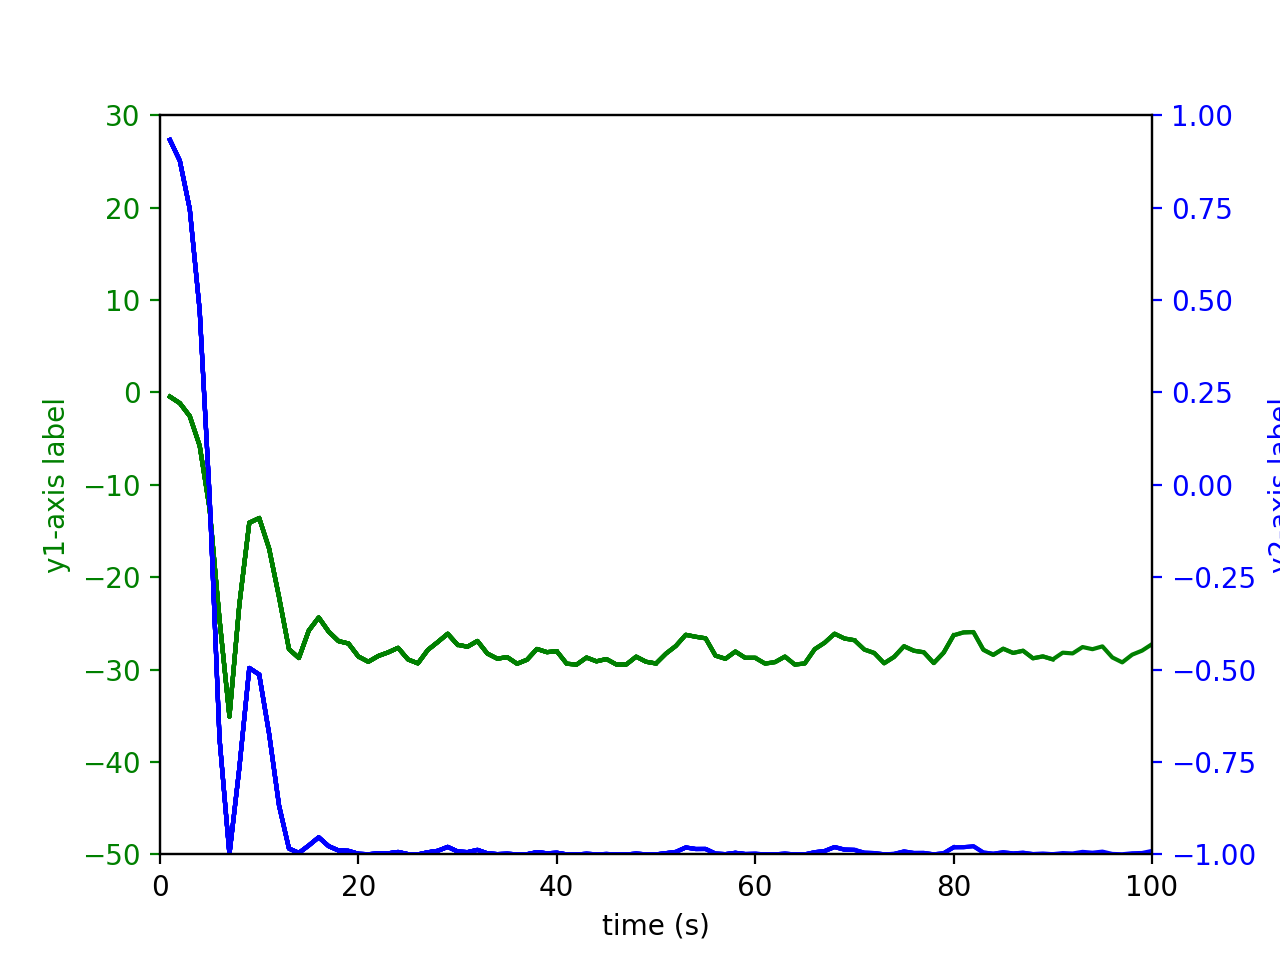

Episode =  950, total reward = -2667.707
Episode =  951, total reward = -2835.396
Episode =  952, total reward = -2757.059
Episode =  953, total reward = -2184.583
Episode =  954, total reward = -2414.587
Episode =  955, total reward = -2785.046
Episode =  956, total reward = -2763.392
Episode =  957, total reward = -2840.898
Episode =  958, total reward = -2193.595
Episode =  959, total reward = -2637.264
Episode =  960, total reward = -2355.211
Episode =  961, total reward = -2294.989
Episode =  962, total reward = -2392.680
Episode =  963, total reward = -2384.651
Episode =  964, total reward = -2378.698
Episode =  965, total reward = -2367.319
Episode =  966, total reward = -2331.412
Episode =  967, total reward = -2177.954
Episode =  968, total reward = -2212.670
Episode =  969, total reward = -2253.599
Episode =  970, total reward = -2359.691
Episode =  971, total reward = -2320.825
Episode =  972, total reward = -2215.386
Episode =  973, total reward = -2130.937
Episode =  974, 

<IPython.core.display.Javascript object>


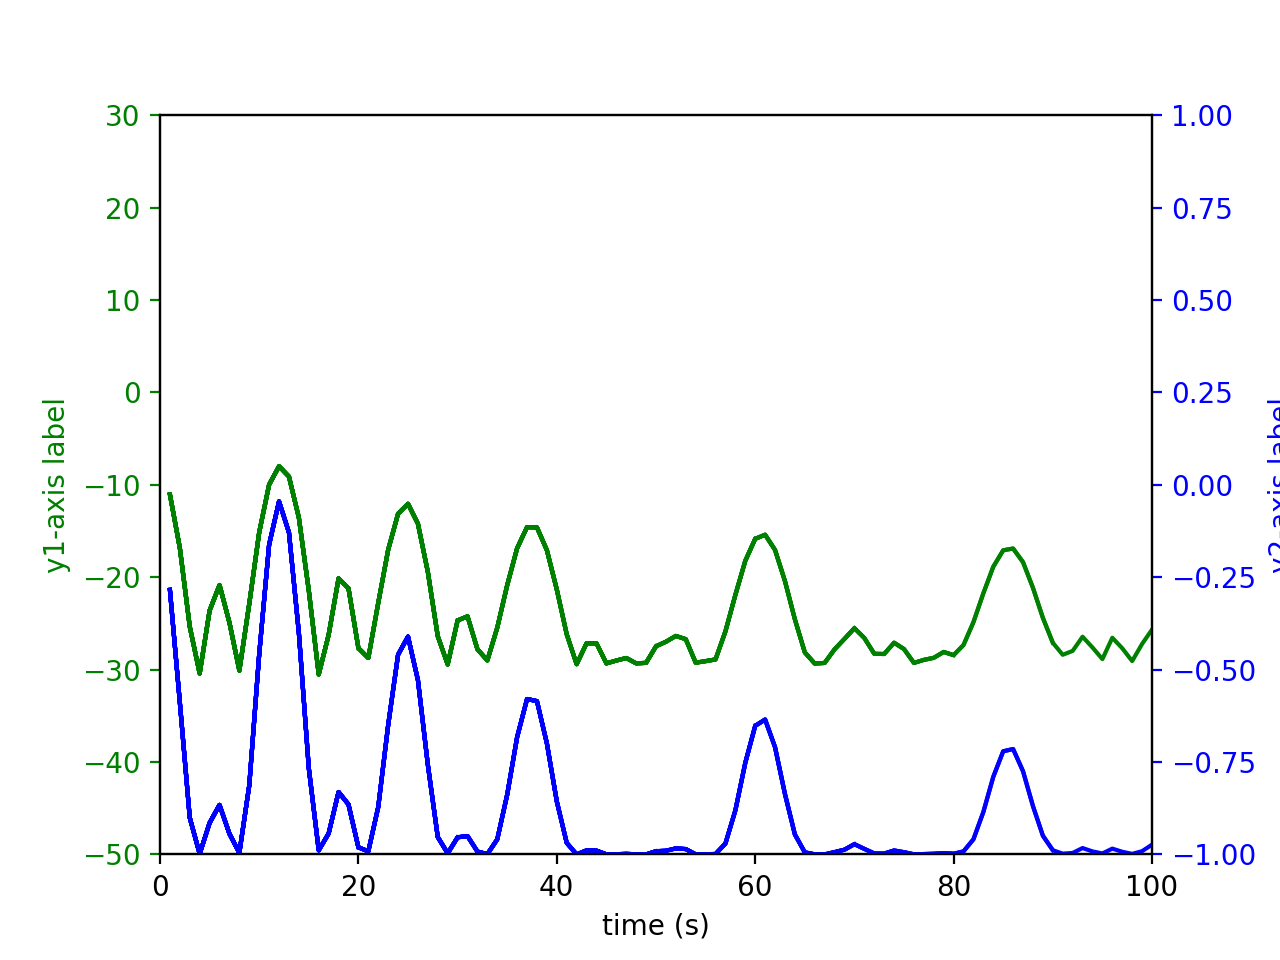

Episode = 1000, total reward = -2407.248


In [2]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

num_episodes = 1000
task = PendulumTask()
agent = DDPG(task) 

display_freq = 50
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        # within the episode loop
        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
            #print(task.current_steps)
            #print(f'Episode number {i_episode}')
            #print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
        #    print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
        #    if (episode % display_freq == 0) and (display_graph == True):
        #               plt_dynamic(x, y1, y2)
            break

    #if display_graph:  
    #    plt_clear(fig)
    #sys.stdout.flush()

In [ ]:
init_pose = [0., 0., 10., 0., 0., 0.]
inital_velocity = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]

In [ ]:
import matplotlib as plt

# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

time_limit = 1
y1_lower = -10
y1_upper = 10
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')

In [ ]:
x, y1, y2 = [], [], [] 

for i in range(100):
    x.append(i)
    y1.append(i)
    y2.append(2 * i)
    plt_dynamic(x, y1, y2)

In [ ]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 20.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

display_graph = True
display_freq = 5

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    # prior to the start of each episode, clear the datapoints
    x, y1, y2 = [], [], []    
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        # within the episode loop
        if (i_episode % display_freq == 0) and (display_graph == True):
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
        
            print(f'Episode number {i_episode}')
            print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
            print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, reward = {:7.3f}".format(
                i_episode, reward), end="")  # [debug]
            if (episode % display_freq == 0) and (display_graph == True):
                       plt_dynamic(x, y1, y2)
            break
       
    sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: